In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# load images off disk
train_images = np.load("../task7_X_train.npy")
train_labels = np.load("../task7_y_train.npy")
test_images = np.load("../task7_X_test.npy")
test_labels = np.load("../task7_y_test.npy")

In [3]:
# training images info
print("training images shape:", train_images.shape)
print(train_images.dtype)
print(train_images.min())
print(train_images.max())

# training labels shape
print()
print("training labels shape:", train_labels.shape)

training images shape: (4138, 224, 224, 3)
float32
-123.68
151.061

training labels shape: (4138, 4)


In [6]:
# Normalize pixel values to be between 0 and 1
min_value = train_images.min()
range = train_images.max() - train_images.min()
train_images, test_images = (train_images - min_value)/range, (test_images - min_value)/range

In [7]:
# verify normalization of image arrays
print(train_images.shape)
print(train_images.dtype)
print(train_images.min())
print(train_images.max())

(4138, 224, 224, 3)
float32
0.0
1.0


In [14]:
# change format of labels
# currently, a damage level of 2 (moderate) is represented like [0, 0, 1, 0] (with index 2 set to 1)
# instead, the label can be simplified to [2]
def reformat_labels(old_labels):
    new_labels = np.zeros((old_labels.shape[0], 1))
    for i in range(old_labels.shape[0]):
        for j in range(old_labels.shape[1]):
            if old_labels[i][j] == 1:
                new_labels[i] = j
                break

    return new_labels

# verify shape of new label arrays
old_train_labels = train_labels
old_test_labels = test_labels
train_labels = reformat_labels(train_labels)
#test_labels = reformat_labels(test_labels)
print("training labels shape:", train_labels.shape)
print("test labels shape:", test_labels.shape)


TypeError: 'numpy.float32' object is not callable

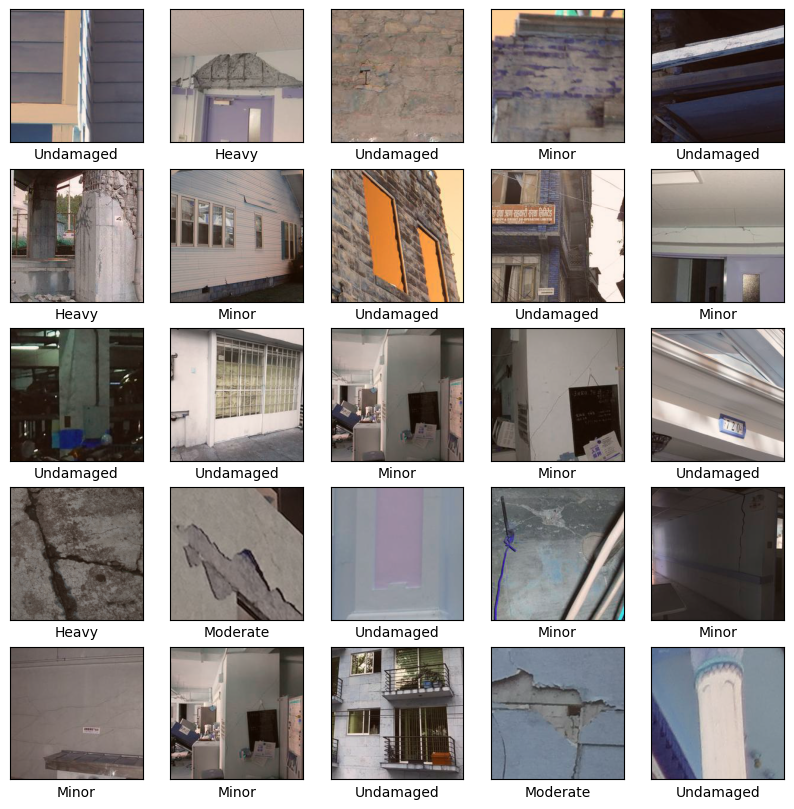

In [18]:
# plotting a sample of the dataset
import random

# verify dataset
label_names = ["Heavy", "Minor", "Moderate", "Undamaged"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    rand_int = random.randrange(len(train_images))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_int])
    plt.xlabel(label_names[int(train_labels[rand_int][0])])

plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
130/130 [==============================] - 387s 3s/step - loss: 1.3646 - accuracy: 0.3642 - val_loss: 1.3248 - val_accuracy: 0.4157
Epoch 2/10
130/130 [==============================] - 91s 701ms/step - loss: 1.3331 - accuracy: 0.3736 - val_loss: 1.2873 - val_accuracy: 0.4157
Epoch 3/10
130/130 [==============================] - 85s 657ms/step - loss: 1.2978 - accuracy: 0.3842 - val_loss: 1.2504 - val_accuracy: 0.4257
Epoch 4/10
130/130 [==============================] - 96s 735ms/step - loss: 1.2616 - accuracy: 0.4273 - val_loss: 1.2617 - val_accuracy: 0.3735
Epoch 5/10
130/130 [==============================] - 100s 773ms/step - loss: 1.2321 - accuracy: 0.4408 - val_loss: 1.2267 - val_accuracy: 0.4317
Epoch 6/10
130/130 [==============================] - 88s 674ms/step - loss: 1.1709 - accuracy: 0.4816 - val_loss: 1.3270 - val_accuracy: 0.4217
Epoch 7/10
130/130 [==============================] - 91s 703ms/step - loss: 1.0941 - accuracy: 0.5162 - val_loss: 1.2812 - val_acc

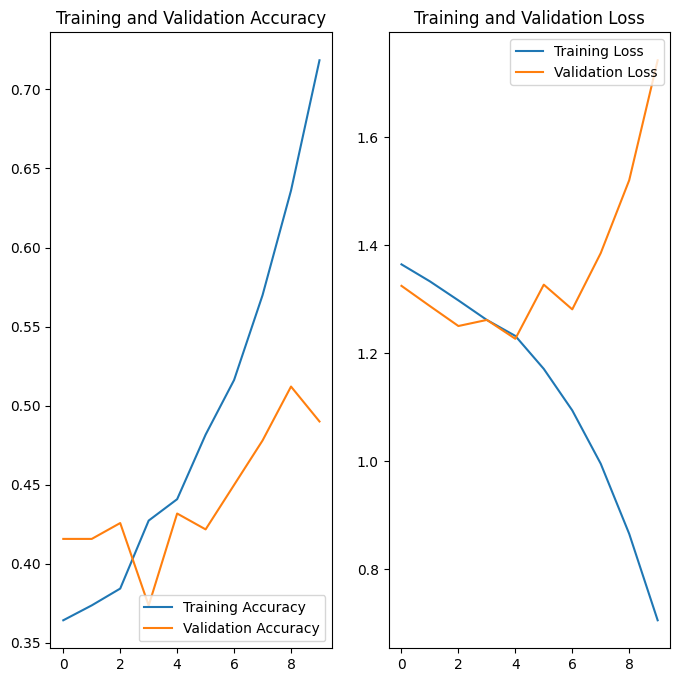

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
from tensorflow import keras

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(224,
                                       224,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    augmented_images = data
    plt.subplot(5,5,i+1)
    rand_int = random.randrange(len(train_images))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_int])
    plt.xlabel(label_names[int(train_labels[rand_int][0])])
